# Exploring Energy Consumption Between Croatia and Slovenia Since 1991

## Introduction

The following data comes from an Energy repository from Our World in Data, which includes a wide range of indicators related to energy consuption, various energy sources, economic indicators, and electricity generation. The final datasets describes energy profiles of Slovenia and Coratia, with rows representing each country from the years 1991 to 2022, and columns that describe demographic information, energy production, energy consuption, per capita metrics, electricity demand and so forth. 

By implementing unsupervised techniques like PCA/SVD Analysis, KMeans clustering, and Hierarchical Clustering, the objective is to find patterns, structures, or groupings among the data. Projecting high-dimensional energy data into 2D/3D space using dimensionality reduction, like PCA/SVD Analysis, might help visualize trajectories of energy evolution and compare the two countries across time periods. Clustering techniques like KMeans might help group years based on similar energy consumption patterns to discover historical trends or energy shifts.

## Theoretical Background

Unsupervised learning are machine learning algorithms that are able to learn from unlabled data, with a goal of understanding the structure of the data or exploring the data further. These types of models may be useful when you dont know the goal initially or you want to learn more about how the data can be grouped into clusters. Some examples of unsupervised learning include prinical component analysis (PCA), Singular Value Decomposition (SVD), Matrix Completion, KMeans clustering, and Hierarchical Clustering.

Principal Component Analysis (PCA) is a dimensionality reduction technique that is widely used to detect unseen trends and patterns by projecting the data into a lower dimensional space while retaining most of the varaince. PCA transforms a dataset with correlated variables into a new coordinate system by identifying orthogonal axes (principal components) where the data variance is maximized. The first principal component accounts for the largest possible variance of the data, where higher values identify important factors that describe the overall dataset. The second component accounts for the next largest variance, showing relationships that are not captures in the first principal component and so forth. Plotting each data point into the space of the first two principal components can help interpret the model by revealing clusters, outliers, and trends in the data.

![PCA Plot](IMG_2057.jpeg)

PCA models can be evaluated by a scree plot which graphs the proportion of variance explained by the number of principal components; this shows how muach variance of the data each principal component describes. By adding up all the varainces captured among principal components, grapphing the cumulative PVE by prinicpal components provides a more clear evaluation that ideally shows the model converging towards 1.0, meaning that most of the variance in the data can be explained by a certain amount of prinicipal components.

![Evalulating PCA Plot](IMG_2059.jpeg)

Singular Value Decomposition (SVD) is a similar technique to PCA, with scaled data, also simialrly used as a dimensionality reduction technique. Given a data matrix (X) of size nxp, it can be decomposed as X=UEV^T. Where U is an nxn matrix that describes the location of each data point in singular vector space, where each column represents a principal component. E is an nxp diagonal matrix of singular values that represent their importance or proportion of variance explained. V^T is the transpose of a pxp orthogonal matrix that shows the direction of variance int he data. 

Matrix completion is a technique that utilizes SVD principals to estimate missing data entires in data sets. SVD helps predict missing values by assuming that the true data lies in lower-dimensional spaces and missing data points can be infered from patterns observed in the principal components. Matrix completion is implemented by first computing the principal components with available data, and then approximating the missing data using the calculated principal components.

KMeans is an unsupervised learning technique that groups data points by minimizing the varaince between the data points and cluster centroids. The algorithm seeks to minimize within-cluster variation using eucledian distance. The first step randomly assigns data points into a cluster. Then the center of each cluster is computed and data points are reassiged to observations closest to the cluster centroid, this is repeated until the algorithm converges. KMeans are a good model to use for specifically numerical data that makes sense when distance is a reasonable metric and points all close to their means. A KMeans model is sensitive to its initialization and the selection of the number of clusters (k). Using a Silhouette score to measure how similar a point is to its own cluster versus other clusters can help choose k.

![Kmeans Plot](IMG_2060.jpeg)

Hierarchical Clustering is an unsupervised learning method that is used to group similar data points together and organize the data into a tree-like structure called a dendrogram. The linkage of the tree is a measure of the distance between clusters before they are merged or divided. Different types of linkages will be explored to analyze the data including complete linkage, average linkage, and single linkage. Complete linkage calculates distance between clusterns by using maximum pariwise dissimilarity, or identifying the most dissimilar group. Complete linkage is useful when distance is meaningful, and it is expected for the data to have clearly seperated groups. Single linkage is calculated by finding the shortest distance between any single point among two clusters, which find the minimal intercluster dissimilarity. This method is useful in finding chain-like clusters where we might expect the data to be connected by a series of close points or irregular groupings, however this can also lead to clusters getting merged through a single data point and sensitivity to outliers.

## Methodology

The original data comes from and Energy Dataset from 'Our World in Data', which contains annual energy data for various countries worldwide spanning a wide range of 130 columns and over 21,000 rows. This study will focus on analyzing annual energy data specifically from Croatia and Slovenia from 1991 to 2022, including infromation on their demographics, energy production, energy consumption, and energy demands. Since the dataset is sparse, with many columns having over 75% missing values, the study will focus on the countries with the least amount of missing values being Slovenia (4.95% missing values) and Croatia (7.08%). To address missing values within these countries, columns with multiple missing values (10+) were dropped and one row included mainly missing values which was also dropped. This resulted in two data sets with no missing values for Croatia and Slovenia's energy profiles with scaled numerical values. The data for croatia and slovenia are combined into one data frame that is sufficent to perform unsupervised learning techniques and discover unseen patterns among the data.

The PCA model will be implemented on the combined data set, removing non numerical columns like country name and year. The data for both countries descibe their energy profile changes over the span of 32 years (32 rows for each country) and 12 energy related varaibles. The data is standardized using StandardScalar to ensure all features equally contribute to the PCA regardless of their original scale. PCA is applied using 12 components, which is the same as the number of features. The explained varaince ratio and cumulative explained variance is computed and ploted for both countries. 

The KMeans model will be implemented by analyzing both Croatia and Slovenia across various cluster sizes from 2 to 14. The optimal model size (k) will be chosen by analyzing the silhouette score and intertia. A lower within cluster variation (intertia) is ideal but the elbow method will be used to acknowledge diminishing returns. A higher Silhouette score will refelct how well seperated and cohesive the clusters are. This model will group different years to see energy related trends among the countries.

Hierarchical Clustering will be implemented using four different linkage methods including: complete, single, average, and ward. The input data was transposed so each energy source is treated as an observation, where rows are the energy types and columns are the years. Dendrograms will be used to visualize the clustering structure. Finally, silhouette analysis will be used to evaluate the optimal number of clusters.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree, fcluster
from scipy.spatial.distance import pdist
from ISLP.cluster import compute_linkage

In [21]:
np.random.seed(3799)

### Data Cleaning and Exploration

In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-data.csv')

In [24]:
# Check the amount of rows and features
df.shape

(21975, 130)

In [25]:
# Check how many nans there are in the columns
pd.set_option('display.max_rows', None)
df.isna().sum()[df.isna().sum() > 0]

iso_code                                         5013
population                                       3389
gdp                                             10205
biofuel_cons_change_pct                         20169
biofuel_cons_change_twh                         19179
biofuel_cons_per_capita                         19575
biofuel_consumption                             19099
biofuel_elec_per_capita                         16221
biofuel_electricity                             15946
biofuel_share_elec                              15970
biofuel_share_energy                            19197
carbon_intensity_elec                           16262
coal_cons_change_pct                            16677
coal_cons_change_twh                            16559
coal_cons_per_capita                            17221
coal_consumption                                16454
coal_elec_per_capita                            15697
coal_electricity                                15071
coal_prod_change_pct        

There is an overwhelmingly large amount of NaNs in this dataset. We need a way to focus on the data that showcases a complete view of the data, i.e., something that has a lot of data present. We will attempt to solve this by calculating the percentages of NaNs by each country to determine if there are any countries containing a low amount of NaNs. We want this because imputing or utilizing methods to fill in NaNs to select our desired countries could result in an unrepresentative dataset, so it is best to work with the countries that are most complete.

In [27]:
# reset the display to not show all rows
pd.reset_option('display.max_rows')

In [28]:
# calculate the percentage of NaNs present in each row
df_copy = df.copy()
df_copy['nan_percent'] = df_copy.isna().mean(axis=1) * 100

# group by country and derive the mean of the NaN percentage to find the country with the lowest amount of NaNs
mean_nan_percent_by_country = df_copy.groupby('country')['nan_percent'].mean()

# selecting for countries that have their data with less than 10% of NaNs
print(mean_nan_percent_by_country[mean_nan_percent_by_country < 10])

country
Croatia     9.054945
Slovenia    6.989011
Name: nan_percent, dtype: float64


The criteria of less than 10% of NaNs shows that there are only two countries present that are able to be worked with. We will use these specific countries for our purposes. Now, we will clean the rest of the NaNs in these countries since utilizing particular unsupervised learning methods requires no NaNs to be present.

In [30]:
croatia = df[df['country'] == 'Croatia']

In [31]:
# determine the columns containing NaNs
croatia_nans = croatia.isna().sum()[croatia.isna().sum() > 0]
croatia_nans

gdp                         2
biofuel_cons_change_pct    20
biofuel_cons_change_twh    19
biofuel_cons_per_capita    18
biofuel_consumption        18
                           ..
wind_cons_change_pct       16
wind_cons_change_twh        2
wind_consumption            1
wind_energy_per_capita      1
wind_share_energy           1
Length: 81, dtype: int64

In [32]:
# Check for rows because we require columns with NaNs that aren't a large proportion of the rows
croatia.shape

(35, 130)

In [33]:
# remove the columns that contain more than one NaN
croatia_no_nans = croatia.loc[:, croatia.isna().sum() <= 1].copy()

In [34]:
# need to find out where the remainder of the NaNs are to determine how they should be removed or imputed
remainder = croatia_no_nans.isna().sum()[croatia_no_nans.isna().sum() > 0]
croatia_nan_idxs = {col: croatia_no_nans.index[croatia_no_nans[col].isna()].tolist() for col in remainder.index}
croatia_nan_idxs

{'coal_cons_per_capita': [5081],
 'coal_consumption': [5081],
 'coal_share_energy': [5081],
 'electricity_share_energy': [5081],
 'energy_per_capita': [5081],
 'fossil_energy_per_capita': [5081],
 'fossil_fuel_consumption': [5081],
 'fossil_share_energy': [5081],
 'gas_consumption': [5081],
 'gas_energy_per_capita': [5081],
 'gas_share_energy': [5081],
 'hydro_consumption': [5081],
 'hydro_energy_per_capita': [5081],
 'hydro_share_energy': [5081],
 'low_carbon_consumption': [5081],
 'low_carbon_energy_per_capita': [5081],
 'low_carbon_share_energy': [5081],
 'nuclear_consumption': [5081],
 'nuclear_energy_per_capita': [5081],
 'nuclear_share_energy': [5081],
 'oil_consumption': [5081],
 'oil_energy_per_capita': [5081],
 'oil_share_energy': [5081],
 'other_renewable_consumption': [5081],
 'other_renewables_energy_per_capita': [5081],
 'other_renewables_share_energy': [5081],
 'primary_energy_consumption': [5081],
 'renewables_consumption': [5081],
 'renewables_energy_per_capita': [5081]

Clearly, the 5081th index is empty, so we can be confident to drop that. 

In [36]:
# drop the 5081th index
croatia_no_nans.drop([5081], inplace=True)

In [37]:
# double check that there are no more NaNs
croatia_no_nans.isna().sum()[croatia_no_nans.isna().sum() > 0]

Series([], dtype: int64)

In [54]:
# Set up slovenia to be cleaned
slovenia = df[df['country'] == 'Slovenia']

In [56]:
# determine the columns containing NaNs
slovenia_nans = slovenia.isna().sum()[slovenia.isna().sum() > 0]
slovenia_nans

gdp                         2
biofuel_cons_change_pct    18
biofuel_cons_change_twh     2
biofuel_cons_per_capita     1
biofuel_consumption         1
                           ..
wind_cons_change_pct       25
wind_cons_change_twh        2
wind_consumption            1
wind_energy_per_capita      1
wind_share_energy           1
Length: 81, dtype: int64

In [58]:
# Check for rows because we require columns with NaNs that aren't a large proportion of the rows
slovenia.shape

(35, 130)

In [60]:
# remove the columns that contain more than one NaN
slovenia_no_nans = slovenia.loc[:, slovenia.isna().sum() <= 1].copy()

In [62]:
# need to find out where the remainder of the NaNs are to determine how they should be removed or imputed
remainder_slov = slovenia_no_nans.isna().sum()[slovenia_no_nans.isna().sum() > 0]
slovenia_nan_idxs = {col: slovenia_no_nans.index[slovenia_no_nans[col].isna()].tolist() for col in remainder_slov.index}
slovenia_nan_idxs

{'biofuel_cons_per_capita': [17648],
 'biofuel_consumption': [17648],
 'biofuel_share_energy': [17648],
 'coal_cons_per_capita': [17648],
 'coal_consumption': [17648],
 'coal_share_energy': [17648],
 'electricity_share_energy': [17648],
 'energy_per_capita': [17648],
 'fossil_energy_per_capita': [17648],
 'fossil_fuel_consumption': [17648],
 'fossil_share_energy': [17648],
 'gas_consumption': [17648],
 'gas_energy_per_capita': [17648],
 'gas_share_energy': [17648],
 'hydro_consumption': [17648],
 'hydro_energy_per_capita': [17648],
 'hydro_share_energy': [17648],
 'low_carbon_consumption': [17648],
 'low_carbon_energy_per_capita': [17648],
 'low_carbon_share_energy': [17648],
 'nuclear_consumption': [17648],
 'nuclear_energy_per_capita': [17648],
 'nuclear_share_energy': [17648],
 'oil_consumption': [17648],
 'oil_energy_per_capita': [17648],
 'oil_share_energy': [17648],
 'other_renewable_consumption': [17648],
 'other_renewables_energy_per_capita': [17648],
 'other_renewables_share_e

Luckily, the Slovenia data is also showing only one row that has missing values.

In [64]:
# drop index 17648 
slovenia_no_nans.drop([17648], inplace=True)

In [66]:
# double check that there are no more NaNs
slovenia_no_nans.isna().sum()[slovenia_no_nans.isna().sum() > 0]

Series([], dtype: int64)

In [68]:
# assign the variables back to workable names for efficiency
slovenia_df = slovenia_no_nans
croatia_df = croatia_no_nans

In [70]:
# isolate the numerical variables 
croatia_df_numeric = croatia_df.drop(['year', 'country', 'iso_code'], axis =1).copy()
slovenia_df_numeric = slovenia_df.drop(['year', 'country', 'iso_code'], axis =1).copy()

We want to determine the primary means of energy consumption for Slovenia and Croatia. Therefore, we will isolate only the columns that are associated with types of energy consumption.

In [72]:
# isolate the consumption columns
consumption_columns_croatia = [col for col in croatia_df_numeric.columns if 'consumption' in col]
consumption_columns_slovenia = [col for col in slovenia_df_numeric.columns if 'consumption' in col]

In [74]:
# select only the consumption columns in the dataframe
croatia_consumption = croatia_df_numeric[consumption_columns_croatia]
slovenia_consumption = slovenia_df_numeric[consumption_columns_slovenia]

In [76]:
# gather the years for each country to use as indices
years_croatia = croatia_df['year']
years_slovenia = slovenia_df['year']

In [78]:
# scale the data for preparation to be used in the models
croatia_scaled = StandardScaler().fit_transform(croatia_consumption)
slovenia_scaled = StandardScaler().fit_transform(slovenia_consumption)

In [80]:
# put the scaled data back into a dataframe, using the years as indices
croatia_dfscaled = pd.DataFrame(croatia_scaled, columns=croatia_consumption.columns, index=years_croatia.values)
slovenia_dfscaled = pd.DataFrame(slovenia_scaled, columns=slovenia_consumption.columns, index=years_slovenia.values)

In [82]:
# table head of reasonable variables
slovenia_dfscaled.head()

,biofuel_consumption,coal_consumption,fossil_fuel_consumption,gas_consumption,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,primary_energy_consumption,renewables_consumption,solar_consumption,wind_consumption
1990,-0.799097,1.142495,-0.944490,-0.026720,-1.282534,-1.454238,-1.067025,-2.236537,-1.27627,-1.562389,-1.317471,-0.598594,-0.683167
1991,-0.799097,0.551032,-1.431899,-0.446172,-0.151356,-0.578242,-0.346544,-2.414246,-1.27627,-1.542929,-0.564384,-0.598594,-0.683167
1992,-0.799097,0.809611,-1.648767,-1.704528,-0.481358,-1.615975,-2.488745,-2.569472,-1.27627,-2.259161,-0.784084,-0.598594,-0.683167
1993,-0.799097,0.506821,-1.096261,-1.751240,-1.173941,-1.986816,-2.521844,-1.509714,-1.27627,-1.965201,-1.245174,-0.598594,-0.683167
1994,-0.799097,0.084401,-0.853463,-1.147801,-0.524192,-1.074047,-1.095506,-1.010446,-1.27627,-1.289946,-0.812601,-0.598594,-0.683167


In [84]:
croatia_dfscaled.head()

,coal_consumption,fossil_fuel_consumption,gas_consumption,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,primary_energy_consumption,renewables_consumption,solar_consumption,wind_consumption
1990,1.750954,1.432470,-0.545541,-1.747730,-1.727151,0.0,1.419182,-0.575932,0.442316,-1.727151,-0.477624,-0.666207
1991,-0.177882,-1.172054,-1.426419,-0.416986,-0.755713,0.0,-0.960016,-0.578361,-1.690580,-0.755713,-0.477624,-0.666207
1992,-0.477798,-1.145151,-1.023092,-1.390346,-1.469368,0.0,-0.960016,-0.588888,-2.099751,-1.469368,-0.477624,-0.666207
1993,-0.804426,-0.804625,-0.384490,-1.224108,-1.339557,0.0,-0.631632,-0.554878,-1.663528,-1.339557,-0.477624,-0.666207
1994,-1.497045,-1.010160,-1.098249,-0.491709,-0.812953,0.0,-0.437437,-0.588888,-1.556194,-0.812953,-0.477624,-0.666207


In [88]:
croatia_dfscaled.columns, slovenia_dfscaled.columns

(Index(['coal_consumption', 'fossil_fuel_consumption', 'gas_consumption',
        'hydro_consumption', 'low_carbon_consumption', 'nuclear_consumption',
        'oil_consumption', 'other_renewable_consumption',
        'primary_energy_consumption', 'renewables_consumption',
        'solar_consumption', 'wind_consumption'],
       dtype='object'),
 Index(['biofuel_consumption', 'coal_consumption', 'fossil_fuel_consumption',
        'gas_consumption', 'hydro_consumption', 'low_carbon_consumption',
        'nuclear_consumption', 'oil_consumption', 'other_renewable_consumption',
        'primary_energy_consumption', 'renewables_consumption',
        'solar_consumption', 'wind_consumption'],
       dtype='object'))

Since we want seamless consistency between the two countries for proper comparison, the columns must match. Therefore, we must drop 'biofuel_consumption' from the Slovenia dataframe for consistency, as it is the only column mismatch between the two countries.

In [93]:
# drop biofuel consumption for consistency
slovenia_dfscaled.drop('biofuel_consumption', axis =1, inplace=True)

In [97]:
# Check to see if it was properly dropped
slovenia_dfscaled.columns

Index(['coal_consumption', 'fossil_fuel_consumption', 'gas_consumption',
       'hydro_consumption', 'low_carbon_consumption', 'nuclear_consumption',
       'oil_consumption', 'other_renewable_consumption',
       'primary_energy_consumption', 'renewables_consumption',
       'solar_consumption', 'wind_consumption'],
      dtype='object')

In [99]:
# Combine data frames for croatia and slovenia

# Add country column
slovenia_dfscaled['country'] = 'Slovenia'
croatia_dfscaled['country'] = 'Croatia'

# Combine them
df = pd.concat([slovenia_dfscaled, croatia_dfscaled])

df.head()

,coal_consumption,fossil_fuel_consumption,gas_consumption,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,primary_energy_consumption,renewables_consumption,solar_consumption,wind_consumption,country
1990,1.142495,-0.944490,-0.026720,-1.282534,-1.454238,-1.067025,-2.236537,-1.27627,-1.562389,-1.317471,-0.598594,-0.683167,Slovenia
1991,0.551032,-1.431899,-0.446172,-0.151356,-0.578242,-0.346544,-2.414246,-1.27627,-1.542929,-0.564384,-0.598594,-0.683167,Slovenia
1992,0.809611,-1.648767,-1.704528,-0.481358,-1.615975,-2.488745,-2.569472,-1.27627,-2.259161,-0.784084,-0.598594,-0.683167,Slovenia
1993,0.506821,-1.096261,-1.751240,-1.173941,-1.986816,-2.521844,-1.509714,-1.27627,-1.965201,-1.245174,-0.598594,-0.683167,Slovenia
1994,0.084401,-0.853463,-1.147801,-0.524192,-1.074047,-1.095506,-1.010446,-1.27627,-1.289946,-0.812601,-0.598594,-0.683167,Slovenia


### Principal Component Analysis (PCA)

In [101]:
df.shape

(68, 13)

In [103]:
df.columns

Index(['coal_consumption', 'fossil_fuel_consumption', 'gas_consumption',
       'hydro_consumption', 'low_carbon_consumption', 'nuclear_consumption',
       'oil_consumption', 'other_renewable_consumption',
       'primary_energy_consumption', 'renewables_consumption',
       'solar_consumption', 'wind_consumption', 'country'],
      dtype='object')

In [105]:
# drop non numerical columns for PCA analysis (country and year)
pca_df = df.drop(columns=['country'])
pca_df.head()

,coal_consumption,fossil_fuel_consumption,gas_consumption,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,primary_energy_consumption,renewables_consumption,solar_consumption,wind_consumption
1990,1.142495,-0.944490,-0.026720,-1.282534,-1.454238,-1.067025,-2.236537,-1.27627,-1.562389,-1.317471,-0.598594,-0.683167
1991,0.551032,-1.431899,-0.446172,-0.151356,-0.578242,-0.346544,-2.414246,-1.27627,-1.542929,-0.564384,-0.598594,-0.683167
1992,0.809611,-1.648767,-1.704528,-0.481358,-1.615975,-2.488745,-2.569472,-1.27627,-2.259161,-0.784084,-0.598594,-0.683167
1993,0.506821,-1.096261,-1.751240,-1.173941,-1.986816,-2.521844,-1.509714,-1.27627,-1.965201,-1.245174,-0.598594,-0.683167
1994,0.084401,-0.853463,-1.147801,-0.524192,-1.074047,-1.095506,-1.010446,-1.27627,-1.289946,-0.812601,-0.598594,-0.683167


In [107]:
# perform PCA with 12 components (the same as the number of columns)
pca = PCA(n_components=12)
x_pca = pca.fit_transform(pca_df)

In [109]:
# get the proportion of variance of each component
explained_var = pca.explained_variance_ratio_

# get the cumulative proportion of variance
cum_explained_var = np.cumsum(explained_var)

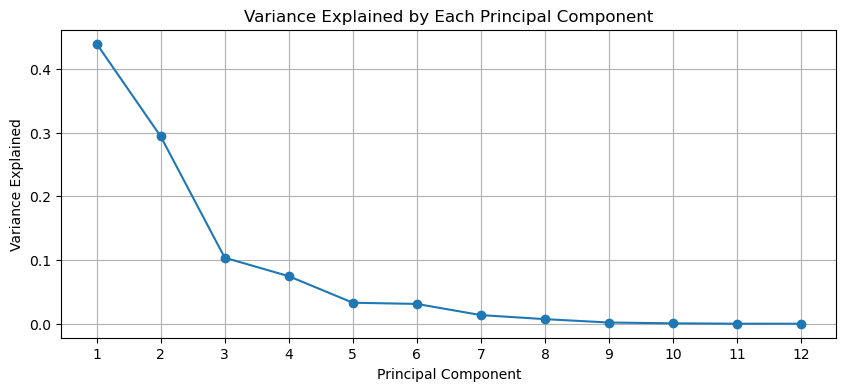

In [111]:
# plot the variance explained by each principal component
plt.figure(figsize=(10,4))
plt.plot(range(1, 13), explained_var, 'o-')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by Each Principal Component')
plt.xticks(range(1, 13))
plt.grid()
plt.show()

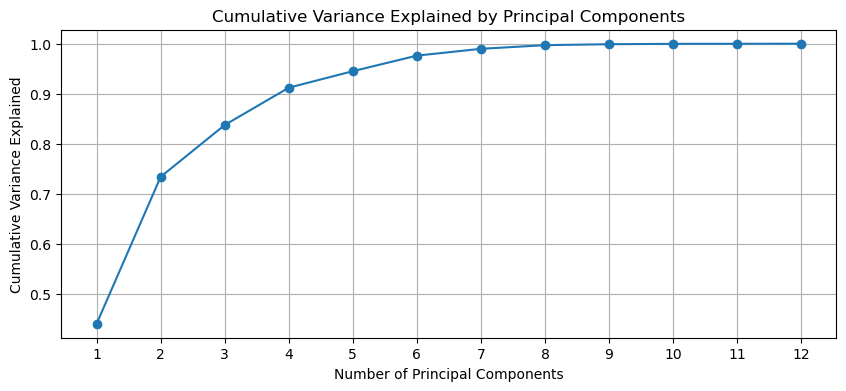

In [113]:
# plot the cumulative proportional variance 
plt.figure(figsize=(10,4))
plt.plot(range(1, 13), cum_explained_var, 'o-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

### Discuss what the shape of it means about the decomposition:
The scree plot shows the proportion of variance explained by each prinicipal component, and the aggregated graph helps see how many prinicpal components are optimal in capturing the varaince of this datast. It is only the first 8 principal components that contain all of the variance of the data, with the first PC explaining almost half (~46%) of the total variance in explaining the energy consumption for noth countries. Let's look closer to determine the weights of the first principal component to determine what features are contributing to this outcome.

In [116]:
# check the weights of each of the features to see what they contribute to with the first PC
loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                        index=pca_df.columns)


print(loadings['PC1']) 

coal_consumption              -0.298876
fossil_fuel_consumption       -0.301789
gas_consumption               -0.196908
hydro_consumption              0.214563
low_carbon_consumption         0.354209
nuclear_consumption            0.037766
oil_consumption               -0.175577
other_renewable_consumption    0.351173
primary_energy_consumption    -0.092131
renewables_consumption         0.384032
solar_consumption              0.379393
wind_consumption               0.392223
Name: PC1, dtype: float64


In [118]:
# sorted weights PC1
sorted_pc1 = loadings['PC1'].sort_values(ascending=False)
print(sorted_pc1)

wind_consumption               0.392223
renewables_consumption         0.384032
solar_consumption              0.379393
low_carbon_consumption         0.354209
other_renewable_consumption    0.351173
hydro_consumption              0.214563
nuclear_consumption            0.037766
primary_energy_consumption    -0.092131
oil_consumption               -0.175577
gas_consumption               -0.196908
coal_consumption              -0.298876
fossil_fuel_consumption       -0.301789
Name: PC1, dtype: float64


In [120]:
# sorted weights PC2
sorted_pc2 = loadings['PC2'].sort_values(ascending=False)
print(sorted_pc2)

solar_consumption             -0.013360
wind_consumption              -0.028839
coal_consumption              -0.123750
other_renewable_consumption   -0.170910
renewables_consumption        -0.221918
nuclear_consumption           -0.258330
hydro_consumption             -0.263029
low_carbon_consumption        -0.297701
gas_consumption               -0.316942
fossil_fuel_consumption       -0.385382
oil_consumption               -0.393479
primary_energy_consumption    -0.526190
Name: PC2, dtype: float64


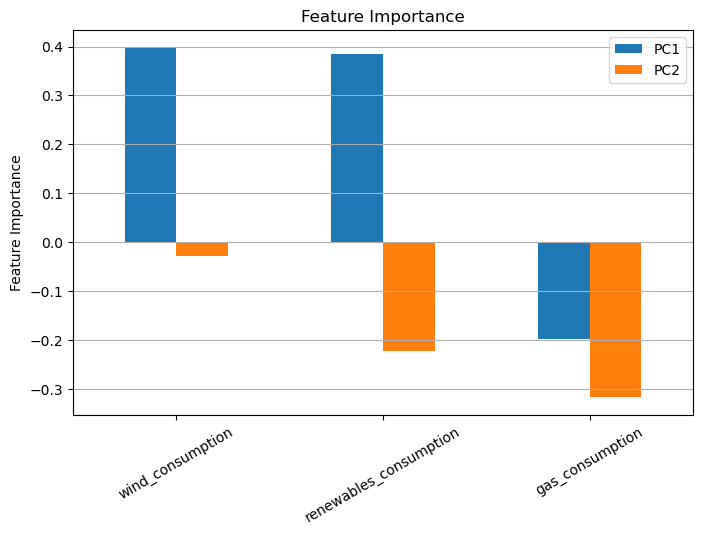

In [122]:
### Graphing important features

# Loadings for selected features on PC1 and PC2
features = ['wind_consumption', 'renewables_consumption', 'gas_consumption']
pc1_loadings = [0.3982848 , 0.384032, -0.196908]
pc2_loadings = [-0.028839, -0.221918, -0.316942]  

# Create DataFrame
loadings_df = pd.DataFrame({
    'PC1': pc1_loadings,
    'PC2': pc2_loadings
}, index=features)

# Plot
loadings_df.plot(kind='bar', figsize=(8,5))
plt.title('Feature Importance')
plt.ylabel('Feature Importance')
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.show()

The first principal component represents a clear difference between renewable/low-carbon energy sources and fossil fuel consumption. Years with higher wind, solar, and other renewable energy use score highly on this component, while years with greater fossil fuel (especially oil and gas) consumption score lower. To figure out how this is changing over time, we can plot the years with the principal components and see how high or low they are.

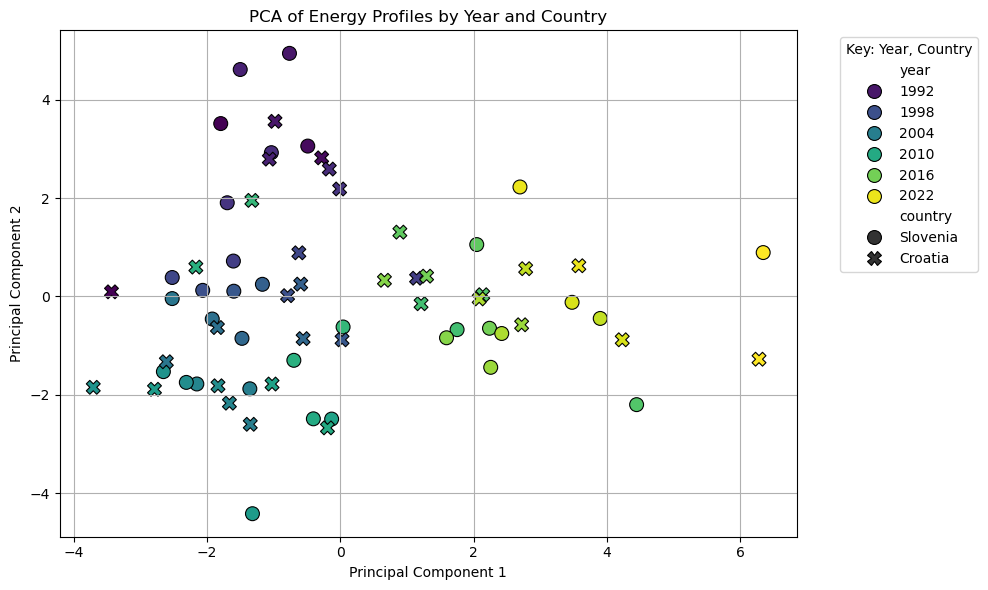

In [125]:
import seaborn as sns

# df is original data and x_pca is the PCA result
pca_df_plot = pd.DataFrame({
    'PC1': x_pca[:, 0],
    'PC2': x_pca[:, 1],
    'year': df.index,
    'country': df['country'].values
})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df_plot, x='PC1', y='PC2', hue='year', style='country',
                palette='viridis', s=100, edgecolor='k')

plt.title('PCA of Energy Profiles by Year and Country')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Key: Year, Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


From these graphs, the earlier years show low PC1 values and the later years show higher PC1 values, we can reasonably conclude that the main trend in energy consumption has been a shift from fossil fuels toward renewables over time.

### Comparing Fossil Fuel and Renewable Energy features against the first two principal components

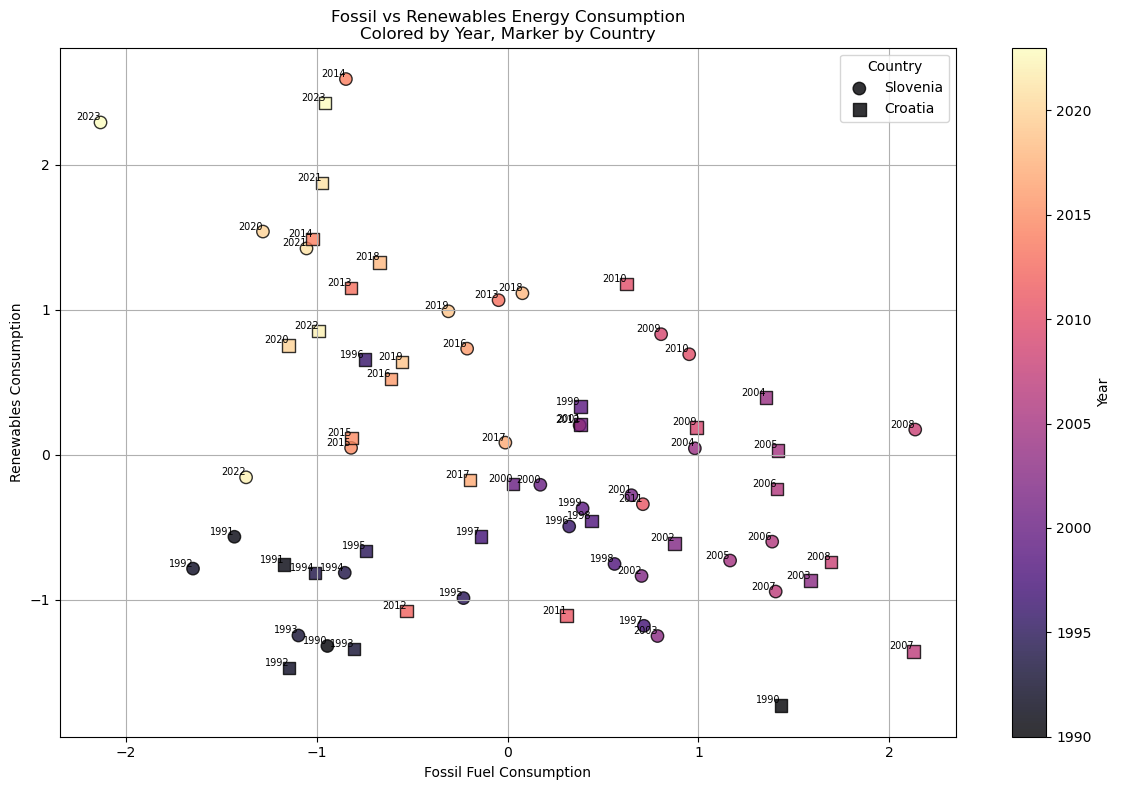

In [128]:
# Features to use
features = ['fossil_fuel_consumption', 'renewables_consumption']

# Scale features and preserve index
scaler = StandardScaler()
scaled_features = scaler.fit_transform(pca_df[features])
df_scaled = pd.DataFrame(scaled_features, columns=features, index=df.index)

# Add metadata
df_scaled['country'] = df['country'].values
df_scaled['year'] = df.index

# Unique countries and markers
unique_countries = df_scaled['country'].unique()
markers = ['o', 's'] 
marker_map = {country: markers[i % len(markers)] for i, country in enumerate(unique_countries)}

# Plot
plt.figure(figsize=(12, 8))

for country in unique_countries:
    country_df = df_scaled[df_scaled['country'] == country]
    
    plt.scatter(country_df['fossil_fuel_consumption'], 
                country_df['renewables_consumption'], 
                c=country_df['year'], cmap='magma', s=80,
                marker=marker_map[country], label=country, edgecolor='k', alpha=0.8)

# Labels and legend
plt.xlabel('Fossil Fuel Consumption')
plt.ylabel('Renewables Consumption')
plt.title("Fossil vs Renewables Energy Consumption\nColored by Year, Marker by Country")
plt.colorbar(label='Year')
plt.legend(title='Country')

# Optional: add year labels
for i, row in df_scaled.iterrows():
    plt.text(row['fossil_fuel_consumption'], row['renewables_consumption'], 
             str(row['year']), fontsize=7, ha='right', va='bottom')

plt.grid(True)
plt.tight_layout()
plt.show()


For fossil fuel and renewable consumption, there is a progression over the years, with early years (darker colors, e.g., 1992–1995) clustered at the bottom left of the graph, showing overall low consumption among the two countries. Middle years (pinky tones, eg. 1997-2005) are spread across the right side of the graph showing an increased fossil consumption over this period. However, a recent shift (orange/yellow, eg. post 2010) shows a decrease in fossil fuel consumption and increase in renewable energy. This is showing the two countries progression from fossil fuel consumption in the industrial boom and into the new era of renewable energy.

The graph also attempts to show a distinction between Croatia and Solvenia's energy profiles, but we see that the circles and squares often overlap implying these countries follow similar enery profiles and trends throughout the years.

### How can the U and V* matrix from the SVD (or "x" and "rotation" from PCA) be interpreted?

In [131]:
# peform the decomposition
U, S, Vt = np.linalg.svd(pca_df, full_matrices=False)

In [133]:
# inspect the shape of each
U.shape, S.shape, Vt.shape

((68, 12), (12,), (12, 12))

In [135]:
# view one of each item
U[:1], S[:1], Vt[:1]

(array([[-0.09678481, -0.23193251,  0.02107957, -0.22590974, -0.00626704,
          0.011872  ,  0.07482818,  0.02129615, -0.10666007, -0.25362289,
          0.05419036, -0.00214513]]),
 array([18.53927234]),
 array([[-0.29887641, -0.30178923, -0.19690802,  0.21456262,  0.35420907,
          0.03776589, -0.17557734,  0.35117324, -0.09213109,  0.38403168,
          0.37939263,  0.3922227 ]]))

Each row of **U** can be interpreted as one observation (in our case, each year and country) that has 12 scores, each one representing the principal component it is associated with (e.g., the first index in the row represents the first principal component). All these observations indicate how each load onto each principal component. For example, taking the first column of U (PC1), it shows us how all the years are being loaded/projected onto the first principal component.

Each row of **Vt** can be interpreted as how each feature is weighted on each principal component. So the larger the value (in magnitude), the more that feature influences the corresponding principal component, and positive and negative values show whether the feature contributes in the same direction as the component or in the opposite direction. Therefore, if one looks at the first row of Vt, it can be seen which features are most responsible for the variation captured by the first principal component.

## K-Means Clustering

In [138]:
# drop non numerical columns for K-means analysis (country and year)
k_means_df = df.drop(columns=['country'])
k_means_df.head()

,coal_consumption,fossil_fuel_consumption,gas_consumption,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,primary_energy_consumption,renewables_consumption,solar_consumption,wind_consumption
1990,1.142495,-0.944490,-0.026720,-1.282534,-1.454238,-1.067025,-2.236537,-1.27627,-1.562389,-1.317471,-0.598594,-0.683167
1991,0.551032,-1.431899,-0.446172,-0.151356,-0.578242,-0.346544,-2.414246,-1.27627,-1.542929,-0.564384,-0.598594,-0.683167
1992,0.809611,-1.648767,-1.704528,-0.481358,-1.615975,-2.488745,-2.569472,-1.27627,-2.259161,-0.784084,-0.598594,-0.683167
1993,0.506821,-1.096261,-1.751240,-1.173941,-1.986816,-2.521844,-1.509714,-1.27627,-1.965201,-1.245174,-0.598594,-0.683167
1994,0.084401,-0.853463,-1.147801,-0.524192,-1.074047,-1.095506,-1.010446,-1.27627,-1.289946,-0.812601,-0.598594,-0.683167


In [140]:
# Find optimal cluster amount using silhouette score vs inertia
inertia = []
silhouette = []

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(k_means_df)
    inertia.append(kmeans.inertia_)
    silh = silhouette_score(k_means_df, kmeans.labels_)
    silhouette.append(silh)

C:\Users\stefa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\stefa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\stefa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\stefa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

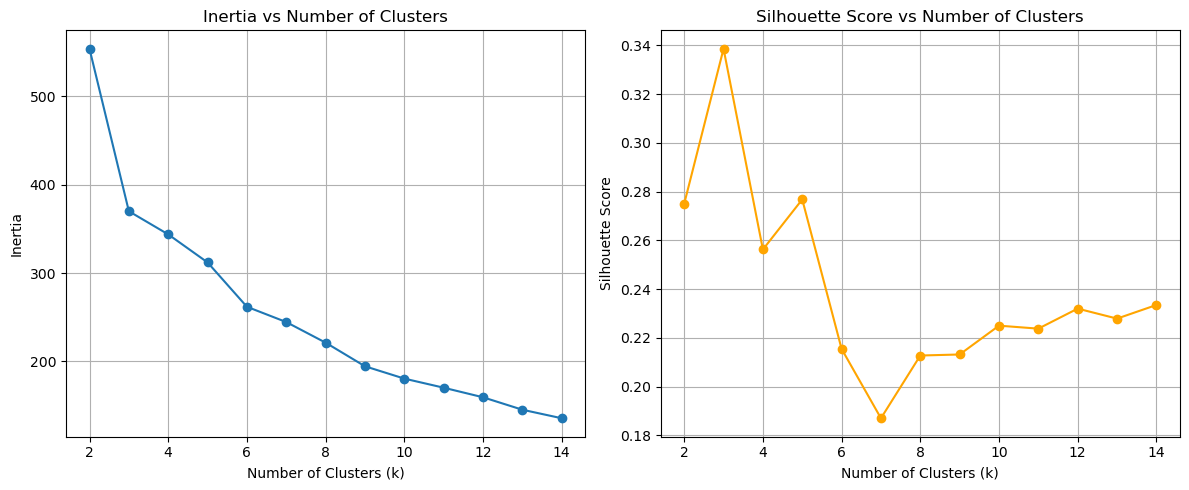

In [142]:
# Plotting the results
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 15), inertia, marker='o')
plt.title('Inertia vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(2, 15), silhouette, marker='o', color='orange')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

Based on the silhouette vs inertia scores for both Croatia and Slovenia, a good number of clusters is 3 because this is where the silhouette score is highest for each country and where there is a large drop in inertia. It isn't quite at the elbow yet, but we are informed to pick this because of the silhouette score.

In [144]:
# Fit to the decided number of clusters, concluded from inertia vs silh plots
kmeans = KMeans(n_clusters = 3, random_state = 3799, n_init = 50).fit(k_means_df)

C:\Users\stefa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [146]:
# get the cluster labels and assign them to the respected df
k_means_df['Cluster'] = kmeans.labels_

In [148]:
# view variances to plot
variances = k_means_df.var().sort_values(ascending=False)
print(variances.head(10))

solar_consumption              1.014925
hydro_consumption              1.014925
wind_consumption               1.014925
coal_consumption               1.014925
oil_consumption                1.014925
renewables_consumption         1.014925
gas_consumption                1.014925
low_carbon_consumption         1.014925
fossil_fuel_consumption        1.014925
other_renewable_consumption    1.014925
dtype: float64


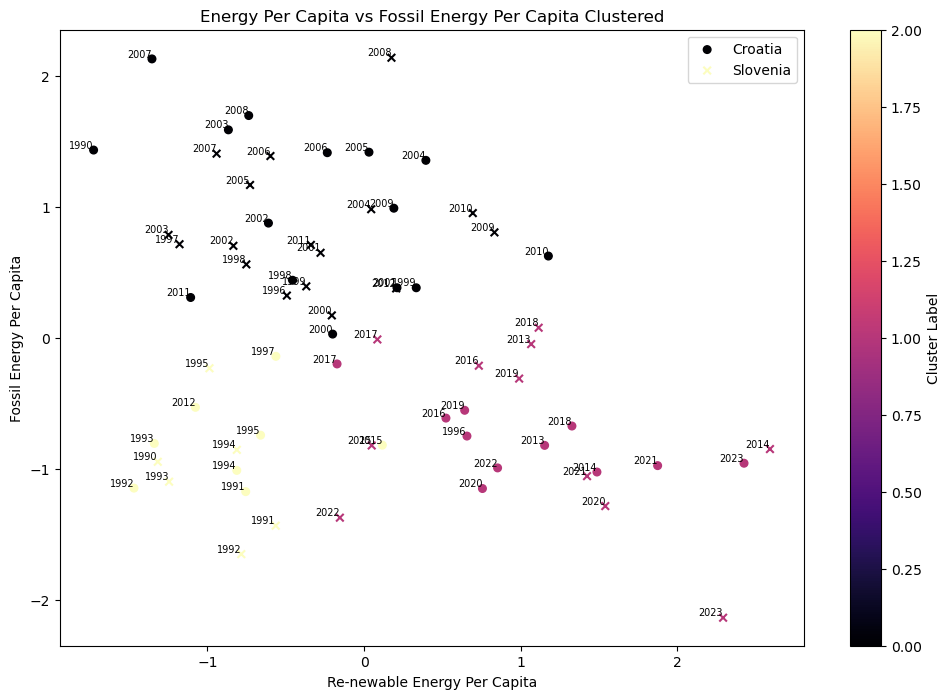

In [168]:
plt.figure(figsize=(12,8))

# Plot Croatia
croatia_mask = df['country'] == 'Croatia'
plt.scatter(
    k_means_df.loc[croatia_mask, 'renewables_consumption'],
    k_means_df.loc[croatia_mask, 'fossil_fuel_consumption'],
    c=kmeans.labels_[croatia_mask], 
    cmap='magma',
    s=30,
    marker='o',
    label='Croatia'
)

# Plot Slovenia
slovenia_mask = df['country'] == 'Slovenia'
plt.scatter(
    k_means_df.loc[slovenia_mask, 'renewables_consumption'],
    k_means_df.loc[slovenia_mask, 'fossil_fuel_consumption'],
    c=kmeans.labels_[slovenia_mask], 
    cmap='magma',
    s=30,
    marker='x',
    label='Slovenia'
)

plt.xlabel('Re-newable Energy Per Capita')
plt.ylabel('Fossil Energy Per Capita')
plt.title('Energy Per Capita vs Fossil Energy Per Capita Clustered')

plt.colorbar(label='Cluster Label')
plt.legend()

# Add year labels if you want to annotate points
for i, year in enumerate(df.index):
    plt.text(k_means_df.iloc[i]['renewables_consumption'], 
             k_means_df.iloc[i]['fossil_fuel_consumption'], 
             str(year), fontsize=7, ha='right', va='bottom')

plt.show()


For both the first two features and the first two principal components, there is clear clustering based on the years. So we will take a closer look into the structure of the features within these clusters for patterns.

In [170]:
# Look closer at the structure of feature space 

# Add cluster labels to the dataframe
k_means_df['Cluster'] = kmeans.labels_

# add back meta data
k_means_df['Country'] = df['country'].values
k_means_df['Year'] = df.index

# Number of clusters
num_clusters = kmeans.n_clusters

# Print indices and mean feature values for each cluster
for i in range(num_clusters):
    print(f"Cluster {i}:")
    cluster_data = k_means_df[k_means_df['Cluster'] == i]
    
    print("Years:", cluster_data['Year'].tolist())
    
    print("Countries:", cluster_data['Country'].tolist())
    
    print("Mean values:\n", cluster_data.drop(columns=['Country', 'Year', 'Cluster']).mean())
    print()


Cluster 0:
Years: [1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 1990, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]
Countries: ['Slovenia', 'Slovenia', 'Slovenia', 'Slovenia', 'Slovenia', 'Slovenia', 'Slovenia', 'Slovenia', 'Slovenia', 'Slovenia', 'Slovenia', 'Slovenia', 'Slovenia', 'Slovenia', 'Slovenia', 'Slovenia', 'Slovenia', 'Croatia', 'Croatia', 'Croatia', 'Croatia', 'Croatia', 'Croatia', 'Croatia', 'Croatia', 'Croatia', 'Croatia', 'Croatia', 'Croatia', 'Croatia', 'Croatia', 'Croatia']
Mean values:
 coal_consumption               0.554283
fossil_fuel_consumption        0.914775
gas_consumption                0.653751
hydro_consumption             -0.031798
low_carbon_consumption        -0.235129
nuclear_consumption            0.162549
oil_consumption                0.753841
other_renewable_consumption   -0.398496
primary_energy_consumption     0.744828
renewables_consumption        -0.3

### Evaluation of Clustering Results

Overall both countries, Croatia and Slovenia, are represented in each cluster. Each cluster seems to be more seperated by their year and represented different energy profile trends through time. 

**Cluster 0**: 2013–2022 (Recent Years)
* High in: Low-carbon consumption, renewables, solar, wind, and other renewable consumption (all strongly positive scores).
* Low in: Fossil fuel and oil consumption.

These are recent years where both countries made a significant shift toward renewables (especially solar and wind) while reducing fossil fuel and oil consumption. This reflects a period of strong adoption of clean energy sources and decline in fossil fuel dependence.

**Cluster 1**: 1990, 2001-2011 (Stability and Recovery)
* High in: coal, fossil fuel, oil and gas consumption
* Low in: renewable consumption, other renwables, solar, wind
  
This group reflect a period beofre or during shifts towards renewable energy but heavy reliance on fossil fules, characterized by lower overall energy use and particularly low renewable adoption. It likely reflects the counrties energy profile before significant changes toward renewables began.

**Cluster 2**: 1991-2000, 2012, 2015
* Overall nergative values, but especially in: primary energy consumption, fossil fuel, and low carbon


This cluster show low energy consumption overall that may likely be due to ecnomic slow downs or recovery perionds. Earlier periods like pre 2000's may show overall lower energy consumption due to infrastructure limmitations and overall lower need for energy.

## Heirarchical Clustering

In [216]:
### Data Cleaning
np.random.seed(3799)

# features (energy types), meta data (country, year)
metadata = df[['country']].copy()
features = df.drop(columns=['country'])

# scale features
scaler = StandardScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(features),
                               columns=features.columns,
                               index=features.index)

In [217]:
# initialize hierarchical clustering
hclust = AgglomerativeClustering()
clusters = hclust.fit_predict(features_scaled)

In [218]:
### clusters

# add back meta data and features
metadata['Cluster'] = clusters
features_scaled['Cluster'] = clusters

# view clusters
combined_df = pd.concat([metadata, features_scaled.drop(columns='Cluster')], axis=1)
combined_df['Cluster'] = clusters

print(combined_df)

       country  Cluster  coal_consumption  fossil_fuel_consumption  \
1990  Slovenia        0          1.750954                 1.432470   
1991  Slovenia        0         -0.177882                -1.172054   
1992  Slovenia        0         -0.477798                -1.145151   
1993  Slovenia        0         -0.804426                -0.804625   
1994  Slovenia        0         -1.497045                -1.010160   
...        ...      ...               ...                      ...   
2019   Croatia        1         -0.359238                -0.551980   
2020   Croatia        1         -0.686803                -1.148499   
2021   Croatia        1         -0.392041                -0.973812   
2022   Croatia        1         -0.440309                -0.991269   
2023   Croatia        1         -0.824577                -0.955638   

      gas_consumption  hydro_consumption  low_carbon_consumption  \
1990        -0.545541          -1.747730               -1.727151   
1991        -1.426419  

In [226]:
# data for graphs
df_features = df.drop(columns=['country'])
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)


features_scaled = pd.DataFrame(scaler.fit_transform(features),
                               columns=features.columns,
                               index=df.index)
df_scaled = features_scaled.copy()
df_scaled['country'] = df['country']

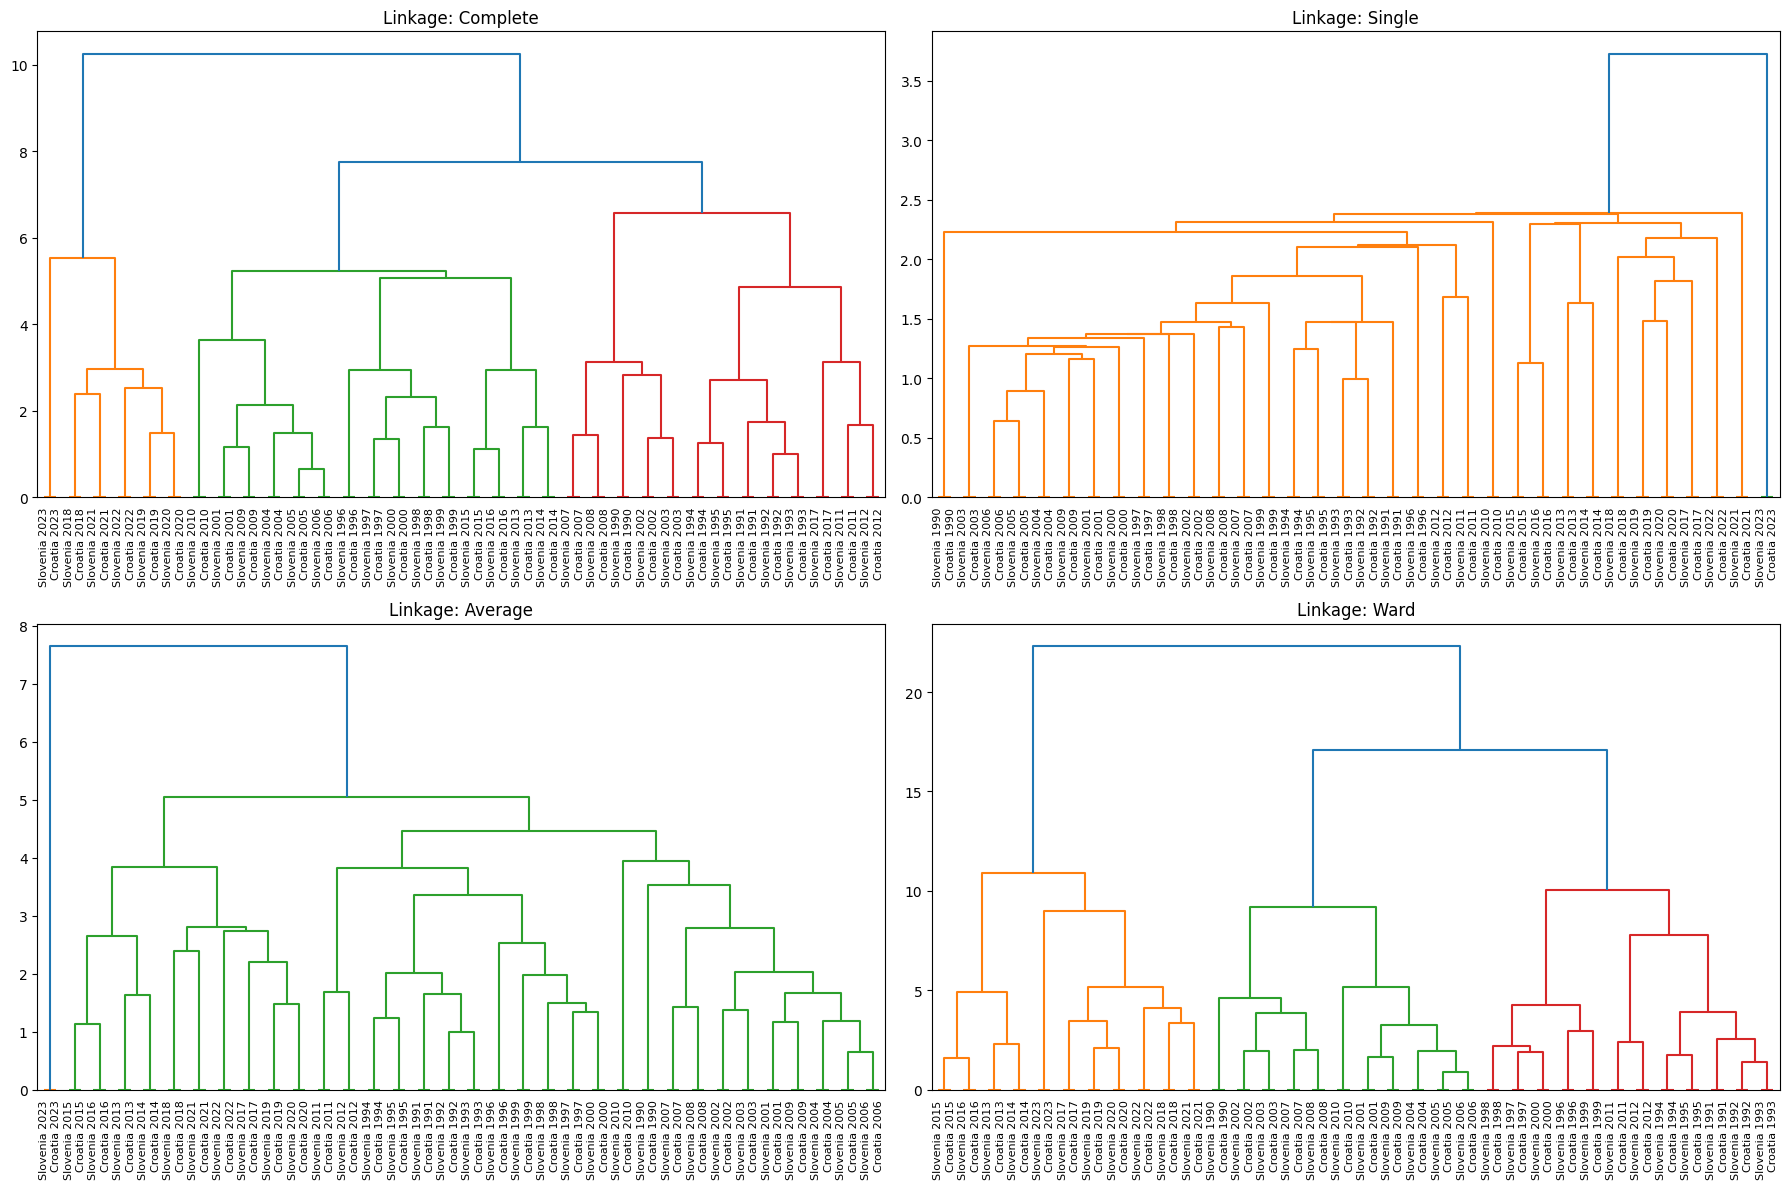

In [230]:
# Define helper to compute linkage
import numpy as np
def compute_linkage(model):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([
        model.children_, 
        model.distances_, 
        counts
    ]).astype(float)
    return linkage_matrix

# year as label
labels = df_scaled.apply(lambda row: f"{row['country']} {row.name}", axis=1).values

# Extract features only for clustering
X = df_scaled.drop(columns=['country'])

# Dendrograms for 4 linkage methods
linkages = ['complete', 'single', 'average', 'ward']
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

for ax, method in zip(axs.flat, linkages):
    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage=method)
    model = model.fit(X)
    Z = compute_linkage(model)
    
    ax.set_title(f"Linkage: {method.capitalize()}")
    dendrogram(Z, ax=ax, labels=labels, leaf_rotation=90)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

In [228]:
def evaluate_clusters_silhouette(data, link, max = 10):
    silhouette_scores = []
    cluster_range = range(2, max + 1) 
    
    for n_clusters in cluster_range:
        cluster_labels = fcluster(link, n_clusters, criterion = 'maxclust')
        score = silhouette_score(data, cluster_labels)
        silhouette_scores.append(score)
    return cluster_range, silhouette_scores

hclust = AgglomerativeClustering
complete = hclust(distance_threshold = 0, n_clusters = None, linkage = 'complete').fit(features)
link_comp = compute_linkage(complete)
croa_range, croa_scores = evaluate_clusters_silhouette(features_scaled, link_comp)

C:\Users\nnaga\AppData\Local\Temp\ipykernel_5892\1093611275.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


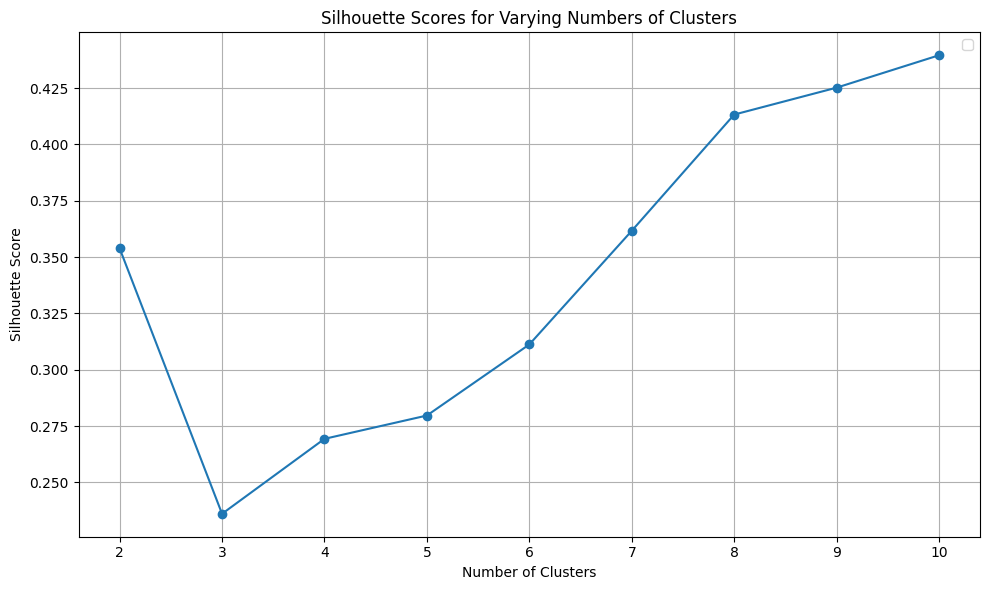

In [229]:
# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(croa_range, croa_scores, 'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Varying Numbers of Clusters')
plt.legend()
plt.grid(True)
plt.xticks(list(croa_range))
plt.tight_layout()
plt.show()

## Results

### PCA
The first 5 prinicpal components pretty much capture most of the variance for both Croatia and Slovania. The first principal component captures almost half of the variance in the data, about 46% for both countries. After 5 principal components, most of the varaince is explained in the data as the graph approaches 1.0. This indicates that the dimensionality of the data can effective be recued from 12 to 5 principal components without significant loss of the datas varaince. 

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Croatia: Variance Explained
axes[0, 0].plot(range(1, 13), explained_var_croatia, 'o-')
axes[0, 0].set_xlabel('Principal Component')
axes[0, 0].set_ylabel('Variance Explained')
axes[0, 0].set_title('Croatia: Variance Explained by Each Principal Component')
axes[0, 0].set_xticks(range(1, 13))
axes[0, 0].grid(True)

# Croatia: Cumulative Variance Explained 
axes[0, 1].plot(range(1, 13), cum_explained_var_croatia, 'o-')
axes[0, 1].set_xlabel('Number of Principal Components')
axes[0, 1].set_ylabel('Cumulative Variance Explained')
axes[0, 1].set_title('Croatia: Cumulative Variance Explained')
axes[0, 1].set_xticks(range(1, 13))
axes[0, 1].grid(True)

# Slovenia: Variance Explained 
axes[1, 0].plot(range(1, 13), explained_var_slovenia, 'o-')
axes[1, 0].set_xlabel('Principal Component')
axes[1, 0].set_ylabel('Variance Explained')
axes[1, 0].set_title('Slovenia: Variance Explained by Each Principal Component')
axes[1, 0].set_xticks(range(1, 13))
axes[1, 0].grid(True)

# Slovenia: Cumulative Variance Explained
axes[1, 1].plot(range(1, 13), cum_explained_var_slovenia, 'o-')
axes[1, 1].set_xlabel('Number of Principal Components')
axes[1, 1].set_ylabel('Cumulative Variance Explained')
axes[1, 1].set_title('Slovenia: Cumulative Variance Explained')
axes[1, 1].set_xticks(range(1, 13))
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()


The first principal component represents a clear difference between renewable/low-carbon energy sources and fossil fuel consumption. Years with higher wind, solar, and other renewable energy use score highly on this component, while years with greater fossil fuel (especially oil and gas) consumption score lower. Principal component 1 reflects a transition from fossil fuel consumption to renewable energy consumption. By plotting PC1 and PC2 and coloring the points by year, we can see a progression that earlier years have low PC1 values and later years have high PC1 values. This reinforcned the interpretation that Croatia and Slovenia have both shifted towards renewable energy sourcers overtime. Plotting Slovenia's first two features, coal and fossil fuel comsumption, there is a visible trend that shows early years have low fossil fuel use, middle years fluctuate, and recent years show declining coal use and low fossil fuel use. 

### SVD
Each row of **U** can be interpreted as one observation (in our case, each year) that has 12 scores, each one representing the principal component it is associated with (e.g., the first index in the row represents the first principal component). All these observations indicate how each load onto each principal component. For example, taking the first column of U (PC1), it shows us how all the years are being loaded/projected onto the first principal component.

Each row of **Vt** can be interpreted as how each feature is weighted on each principal component. So the larger the value (in magnitude), the more that feature influences the corresponding principal component, and positive and negative values show whether the feature contributes in the same direction as the component or in the opposite direction. Therefore, if one looks at the first row of Vt, it can be seen which features are most responsible for the variation captured by the first principal component.

#### KMeans Clustering

For both countries, k = 3 yields the high silhouette scores and a noticeable drop in within cluster variation. A good number of clusters is 3 because this is where the silhouette score is highest for each country and where there is a large drop in inertia. It isn't quite at the elbow yet, but we are informed to pick this because of the silhouette score.

In [ ]:
K = range(2, 15)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

### Croatia
# Elbow
axes[0, 0].plot(K, inertia_ct, 'bo-')
axes[0, 0].set_xlabel('Number of clusters')
axes[0, 0].set_ylabel('Inertia')
axes[0, 0].set_title('Croatia: Elbow Method (Inertia)')

# Silhouette
axes[0, 1].plot(K, silh_ct, 'ro-')
axes[0, 1].set_xlabel('Number of clusters')
axes[0, 1].set_ylabel('Silhouette Score')
axes[0, 1].set_title('Croatia: Silhouette Score')

### Slovenia
# Elbow
axes[1, 0].plot(K, inertia_sv, 'bo-')
axes[1, 0].set_xlabel('Number of clusters')
axes[1, 0].set_ylabel('Inertia')
axes[1, 0].set_title('Slovenia: Elbow Method (Inertia)')

# Silhouette
axes[1, 1].plot(K, silh_sv, 'ro-')
axes[1, 1].set_xlabel('Number of clusters')
axes[1, 1].set_ylabel('Silhouette Score')
axes[1, 1].set_title('Slovenia: Silhouette Score')

plt.tight_layout()
plt.show()


**Cluster 0**: 2013–2022
* High in: Low-carbon consumption, renewables, solar, wind, and other renewable consumption (all strongly positive scores).
* Low in: Fossil fuel, oil, and primary energy consumption.
* Coal and hydro: Around average (near zero).

These are recent years where Croatia has made a significant shift toward renewables (especially solar and wind) while reducing fossil fuel and oil consumption. This reflects a period of strong adoption of clean energy sources and decline in fossil fuel dependence.

**Cluster 1**: 1991–2000, 2012
* Low in: Coal, gas, hydro, low-carbon, other renewables, renewables, solar, wind, and primary energy.
* Near average: Oil (slightly negative), fossil fuels (moderately negative).
* Nuclear: Always zero (no nuclear for all years).

This group consists mostly of early years (the 1990s) and one transitional year (2012), characterized by lower overall energy use and particularly low renewable adoption. It likely reflects Croatia’s energy profile before significant changes toward renewables began.

**Cluster 2**: 2001–2011
* High in: Coal, fossil fuel, gas, oil, and primary energy consumption.
* Low in: Low-carbon, renewables, solar, wind, and other renewables (all negative).
* Hydro: Slightly above average.

These are the mid-years, where fossil fuel consumption (including coal, gas, and oil) was at its highest and renewables were not yet widely adopted. This period may represent an era of increased industrial activity and high energy demand before the transition to renewables.

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

### CROATIA
scatter1 = axes[0].scatter(X_pca_croatia[:, 0], X_pca_croatia[:, 1],
                           c=kmeans_pca_ct.labels_, cmap='magma', s=60)
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].set_title("Croatia: First Two Principal Components by Cluster")
for i, year in enumerate(years_croatia):
    axes[0].text(X_pca_croatia[i, 0], X_pca_croatia[i, 1], str(year),
                 fontsize=8, ha='right', va='bottom')
cbar1 = fig.colorbar(scatter1, ax=axes[0])
cbar1.set_label('Cluster')

### SLOVENIA
scatter2 = axes[1].scatter(X_pca_slovenia[:, 0], X_pca_slovenia[:, 1],
                           c=kmeans_pca_sv.labels_, cmap='magma', s=60)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title("Slovenia: First Two Principal Components by Cluster")
for i, year in enumerate(years_slovenia):
    axes[1].text(X_pca_slovenia[i, 0], X_pca_slovenia[i, 1], str(year),
                 fontsize=8, ha='right', va='bottom')
cbar2 = fig.colorbar(scatter2, ax=axes[1])
cbar2.set_label('Cluster')

plt.tight_layout()
plt.show()


Overall, KMeans clustering sucessfully segmented the country's energy timeline into 3 periods which includes: pre-transition, transition peak of fossil fuel, and pos-transition towards renewables. This allows us to see trends in the data that might not have need as clear before.

#### Hierarchical Clustering

Both countries resulted in structuarlly similar dendrograms, with slight differences in distances between the clustering groups. Complete linkage shows the most balanced and compact structure, grouping similar types of energy together like fuel and oil or carbon and renewables, likely reflecting similar usage patterns within the country. Single linkage shows a very unbalanced dendrogram, and does not do a good job seperating the clusters. Average linkage looks like somewhat of a balance between complete and single, grouping some similar energy types together. Finally the ward cluster shows a pretty clear grouping between renewable energy and fuels. 

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))  # 2 rows, 4 columns

# Slovenia dendrograms
linkages = ['complete', 'single', 'average', 'ward']
titles = ['Linkage: Complete', 'Linkage: Single', 'Linkage: Avg', 'Linkage: Ward']

for i, method in enumerate(linkages):
    model = HClust(distance_threshold=0, n_clusters=None, linkage=method).fit(slov_tf)
    link = compute_linkage(model)
    axes[0, i].set_title(titles[i])
    dendrogram(link, ax=axes[0, i], labels=np.array(slov_label))
    axes[0, i].tick_params(axis='x', rotation=90)

# Croatia dendrograms
for i, method in enumerate(linkages):
    model = HClust(distance_threshold=0, n_clusters=None, linkage=method).fit(croa_tf)
    link = compute_linkage(model)
    axes[1, i].set_title(titles[i])
    dendrogram(link, ax=axes[1, i], labels=np.array(croa_label))
    axes[1, i].tick_params(axis='x', rotation=90)

# General layout tweaks
plt.suptitle("Hierarchical Clustering Dendrograms: Slovenia and Croatia", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()


Comparing the complete linkage dendrogram for both countries, their energy consumption looks almost identical. The fossil fuels are clustered tightly together, and the renewable energy clearly forms a seperate cluster. 

In [ ]:
### Complete Linkage: Croatia vs Slovenia
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))
complete = HClust(distance_threshold = 0, n_clusters = None, linkage = 'complete').fit(croa_tf)
link_comp = compute_linkage(complete)
ax1.set_title("Croatia Energy Sources");
_ = dendrogram(
    link_comp, 
    ax = ax1, 
    labels = np.array(croa_label),)
ax1.tick_params(axis = 'x', rotation = 90)

complete = HClust(distance_threshold = 0, n_clusters = None, linkage = 'complete').fit(slov_tf)
link_comp = compute_linkage(complete)
ax2.set_title("Slovenia Energy Sources");
_ = dendrogram(link_comp, ax = ax2, labels = np.array(slov_label))
ax2.tick_params(axis = 'x', rotation = 90)

plt.tight_layout()
plt.show()

The Silhoutette score helps select the optimal number of clusters, the best number being about 2-3 meaningful clusters for both countries. These groupings likely refer to the separation between foil fuels and renewable energy. Slovenia has a higher silhouette score overall, maybe indicating that they have better defined clusters than Croatia due to more distinct energy usage patters.

In [ ]:
def evaluate_clusters_silhouette(data, link, max = 10):
    silhouette_scores = []
    cluster_range = range(2, max + 1) 
    
    for n_clusters in cluster_range:
        cluster_labels = fcluster(link, n_clusters, criterion = 'maxclust')
        score = silhouette_score(data, cluster_labels)
        silhouette_scores.append(score)
    return cluster_range, silhouette_scores

# Croatian data
complete_croa = HClust(distance_threshold = 0, n_clusters = None, linkage = 'complete').fit(croa_tf)
link_comp_croa = compute_linkage(complete_croa)
croa_range, croa_scores = evaluate_clusters_silhouette(croa_tf, link_comp_croa)

# Slovenian data
complete_slov = HClust(distance_threshold = 0, n_clusters = None, linkage = 'complete').fit(slov_tf)
link_comp_slov = compute_linkage(complete_slov)
slov_range, slov_scores = evaluate_clusters_silhouette(slov_tf, link_comp_slov)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(croa_range, croa_scores, 'o-', label = 'Croatia')
plt.plot(slov_range, slov_scores, 's-', label = 'Slovenia')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Varying Numbers of Clusters')
plt.legend()
plt.grid(True)
plt.xticks(list(croa_range))
plt.tight_layout()
plt.show()

## Discussion

PCA effectively reduced the dimensionality of the datasets while preserving the core structure of the data, hence was able to provide insightful trends and patterns from Croatia and Slovania's energy profile. The dominant trend in both Croatia and Slovenia is a shift in energy consumption patterns, moving from fossil fuels toward renewables over the years. The dimensionality reduction shows that a small number of components (mainly PC1) account for most of the variance, making PCA a valuable tool for visualizing and understanding long-term trends in energy data.

The KMeans model effectively grouped the years into 3 clusters, with similar trends occuring in both Croatia and Slovania. The main trend seen among KMeans clustering is the transition from fossil fuels to renewable energy. The most recent years (2013-2022) show a significant shift towards renewable energy, pariculatlry solar and wind energy. The middle years (2001-2011) show high fossily fuel consumptions, indicating high industrial activity and energy demands during a time when renewable energy was not widely adopted. Lastly the early years (1991-2001) shows over all low energy consumption, with some fossil fuel usage and basically no renewable energy implementations yet. The KMeans model validates and gives mroe insights into our PCA findings, describing the major types of energy usage throughout the years.

Finally, the dendrogram provides a visual representation of the types of energy usage in both Croatia and Slovania. Comparing a hierarchical clustering using complete linkage, their dendrograms look almost identical, indicating that both countries utilize fossil fuels and renewable energy relatively similarly. Again, enforcing our findings from previous unsupervised learning techniques it is clear there is a cluster which represents fossil fuels and one that represents renewable energy. Fossil fuels seem to be groupd in a strong cluster, meaning they are clearly similar in their usage for both countries and an established energy type. The renewable energys are more newly developed and form into their custer more gradually. 

## Conclusion

This study demonstrates the power of unsupervised learning techniques like PCA, KMeans clustering, and hierarchical clustering, in uncovering meaningful patterns within energy consumption data for Croatia and Slovenia. Despite the datasets originating from different countries, the trends revealed were remarkably similar, suggesting a shared trajectory in their energy transitions over the past three decades. Mainly, highlighting the dominant shift from fossil fuel reliance to renewable energy adoption. 

Identifying long term trends in countries using energy profiles reflects broader global energy transition patterns, which can be used to support ongoing polocy changes and enviornemntal efforts. Understanding this newfound shift towards renewable energy can help inform goverments, researchers, and energy providers to better understand historical patterns and make data driven investments about future decisions. This study shows how unsupervised learning technaiques can go beyond simple predictions tasks, to inform strategic decisions about energy, the enviornment, and sustainability.  